## The Yield Curve
A yield curve is a line that plots yields, or interest rates, of bonds that have differing maturity dates. The slope of the yield curve can predict future interest rate changes and economic activity. There are three main yield curve shapes: normal upward-sloping curve, inverted downward-sloping curve, and flat.

* __Normal curves point to economic expansion__. A normal yield curve shows low yields for shorter-maturity bonds and then increases for bonds with a longer maturity, sloping upwards. 
* __Flat yield curves point to an uncertain future__. A flat yield curve reflects similar yields across all maturities, implying an uncertain economic situation.
* __Downward-sloping curves point to economic recession__. An inverted yield curve slopes downward, with short-term interest rates exceeding long-term rates. Such a yield curve corresponds to periods of economic recession, where investors expect yields on longer-maturity bonds to trend lower in the future.

### Learning objectives
In this example, we'll load recent yield datasets and plot them to see which category they are.

### Setup
We load the [VLQuantitativeFinancePackage.jl](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl) package, and several other external [Julia](https://julialang.org/downloads/https://julialang.org/downloads/) packages, as well as some helper code, by calling the [include(...)](https://docs.julialang.org/en/v1/manual/code-loading/https://docs.julialang.org/en/v1/manual/code-loading/) command on the file `Include.jl`:

In [1]:
include("Include.jl");

  Activating project at `~/Desktop/julia_work/CHEME-5660-Examples-F23`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Examples-F23/Manifest.toml`


### Historical Data
Values for the yield on Treasury securities as a function of duration are compiled daily by the United States Treasury and are available for [download](https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics). We've downloaded data for the years `{2021,2022,2023}` We start by specifying which year we are interested in the `year_value` variable:

In [10]:
year_value = "2021";

We call the `MyDailyTreasuryYieldCurveDataSet(…)` function to load the historical data, passing in the `year_value` parameter. The dataset for a particular year is saved in the `dataset` variable, which is a [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl) instance:

In [3]:
dataset = MyDailyTreasuryYieldCurveDataSet(; year = year_value)

Row,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
,String15,Float64,Float64,Float64,Float64?,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,12/30/2022,4.12,4.41,4.42,4.69,4.76,4.73,4.41,4.22,3.99,3.96,3.88,4.14,3.97
2,12/29/2022,4.04,4.39,4.45,4.66,4.73,4.71,4.34,4.16,3.94,3.91,3.83,4.09,3.92
3,12/28/2022,3.86,4.33,4.46,4.66,4.75,4.71,4.31,4.18,3.97,3.97,3.88,4.13,3.98
4,12/27/2022,3.87,4.32,4.46,4.66,4.76,4.75,4.32,4.17,3.94,3.93,3.84,4.1,3.93
5,12/23/2022,3.8,4.2,4.34,4.59,4.67,4.66,4.31,4.09,3.86,3.83,3.75,3.99,3.82
6,12/22/2022,3.8,4.2,4.35,4.57,4.66,4.64,4.24,4.02,3.79,3.77,3.67,3.91,3.73
7,12/21/2022,3.9,4.23,4.33,4.57,4.67,4.6,4.21,4.0,3.78,3.77,3.68,3.93,3.74
8,12/20/2022,3.89,4.23,4.35,4.55,4.7,4.64,4.25,4.03,3.79,3.78,3.69,3.94,3.74
9,12/19/2022,3.95,4.24,4.37,4.57,4.71,4.64,4.25,3.99,3.7,3.67,3.57,3.82,3.62


### Visualize
To plot the `dataset`, first we setup a `duration` list that holds the duration values for each instrument (in units of years). Some years have different instruments, so we need to check which year we have:

In [4]:
if (year_value == "2021")
    duration = [(1/12), (2/12), (3/12), (6/12), 1, 2, 3, 5, 7, 10, 20, 30];
else
    duration = [(1/12), (2/12), (3/12), (4/12), (6/12), 1, 2, 3, 5, 7, 10, 20, 30];
end;

To plot the `dataset`, we convert it into an `Array` type by passing the `dataset` into the `Matrix(...)` constructor:

In [5]:
data = Matrix(dataset[:,2:end])

249×13 Matrix{Union{Missing, Float64}}:
 4.12  4.41  4.42  4.69      4.76  …  4.22  3.99  3.96  3.88  4.14  3.97
 4.04  4.39  4.45  4.66      4.73     4.16  3.94  3.91  3.83  4.09  3.92
 3.86  4.33  4.46  4.66      4.75     4.18  3.97  3.97  3.88  4.13  3.98
 3.87  4.32  4.46  4.66      4.76     4.17  3.94  3.93  3.84  4.1   3.93
 3.8   4.2   4.34  4.59      4.67     4.09  3.86  3.83  3.75  3.99  3.82
 3.8   4.2   4.35  4.57      4.66  …  4.02  3.79  3.77  3.67  3.91  3.73
 3.9   4.23  4.33  4.57      4.67     4.0   3.78  3.77  3.68  3.93  3.74
 3.89  4.23  4.35  4.55      4.7      4.03  3.79  3.78  3.69  3.94  3.74
 3.95  4.24  4.37  4.57      4.71     3.99  3.7   3.67  3.57  3.82  3.62
 3.94  4.22  4.31  4.54      4.68     3.91  3.61  3.58  3.48  3.73  3.53
 3.95  4.24  4.34  4.56      4.7   …  3.96  3.62  3.56  3.44  3.69  3.48
 3.91  4.14  4.33  4.58      4.68     3.94  3.64  3.59  3.49  3.74  3.52
 3.89  4.16  4.35  4.58      4.7      3.96  3.66  3.6   3.51  3.74  3.53
 ⋮         

To compute the mean value of the yield for each instrument, we use the `mean(...)` function from the [Statistics.jl](https://docs.julialang.org/en/v1/stdlib/Statistics/) package, we store the mean in the `μ` variable:

In [11]:
μ = mean(data,dims=1) |> vec;

Finally, we plot the yield values for each day in light gray, and the mean value as the black line using the `plot(...)` command from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package:

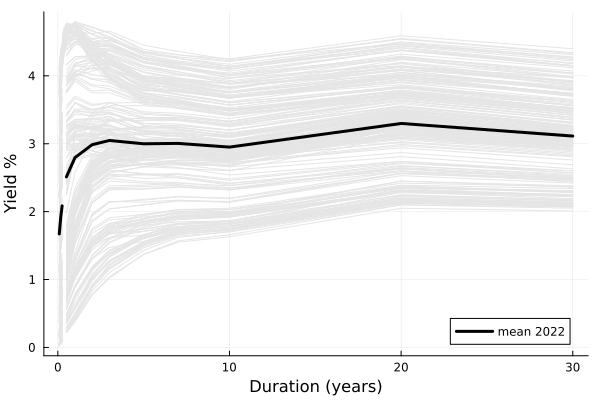

In [8]:
plot(duration, transpose(data), label="", c=:gray90, xlabel="Duration (years)", ylabel="Yield %")
plot!(duration, μ, lw=3, c=:black, label="mean $(year_value)")